In [1]:
import numpy as np, matplotlib.pyplot as plt
from Reg_class import Polyfit, train_test_split, FrankeFunction, DesignMatrix

n = 50
p = 5
P = (p+1)**2
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))

x, y = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)

z = FrankeFunction(x, y) + noise


x, y, z = x.reshape(n**2, 1), y.reshape(n**2, 1), z.reshape(n**2, 1)
X = DesignMatrix(x, y, p)
reg = Polyfit()
OLS_beta, OLS_fit = reg.fit(X, z, 'OLS')




In [2]:
from Reg_class import R2, MSE
print (R2(z, OLS_fit), MSE(z, OLS_fit))

0.8891073832052814 0.010855159402157553


The variance of the regression coefficients are in the lecture notes shown to be 
$$
\text{Var}(\beta_i) = \sigma^2 \sqrt{[(\pmb{X}^T\pmb{X}^{-1})]_{ii}},
$$
and  variance of the input data is estimated by 
$$
\sigma^2 = \frac{1}{n-p-1}\sum_i (z_i - \tilde{z}_i)^2
$$

In [3]:
sigma2 = np.sum((z - OLS_fit)**2)/(n-p-1)
sigma2_beta = sigma2*np.sqrt(np.diag(np.linalg.inv(np.matmul(X.T, X))))
conf_int = 1.96*np.sqrt(sigma2_beta).reshape(P, 1)

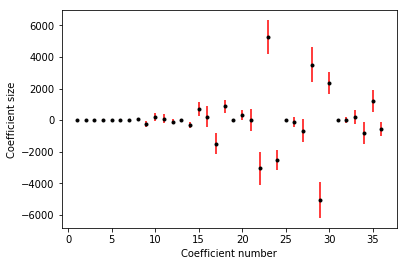

In [4]:
a = np.arange((p+1)**2 +1)[1:]
plt.errorbar(a, OLS_beta, yerr=2*conf_int, fmt='k.', ecolor='r')
plt.xlabel('Coefficient number')
plt.ylabel('Coefficient size')
plt.show()